In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path
import numpy as np

# Data file path
EV_path = "Resources/Electric_Vehicle_Population_Data.csv"

# Read the CSV into a Pandas DataFrame
EV_df = pd.read_csv(EV_path, low_memory=False)

# Print the first five rows of data to the screen
EV_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,5YJ3E1EB1J,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,23.0,475911439,POINT (-122.6368884 47.7469547),PUGET SOUND ENERGY INC,5.303509e+10
2,WP0AD2A73G,Snohomish,Bothell,WA,98012.0,2016,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,15.0,0.0,1.0,101971278,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EB5J,Kitsap,Bremerton,WA,98310.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,23.0,474363746,POINT (-122.6231895 47.5930874),PUGET SOUND ENERGY INC,5.303508e+10
4,1N4AZ1CP3K,King,Redmond,WA,98052.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150.0,0.0,45.0,476346482,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [26]:
groupedEV_count = EV_df.groupby('Model')['VIN (1-10)'].count().reset_index(name='Count')
groupedEV_count.head()

,Model,Count
0,330E,505
1,500,780
2,500E,23
3,530E,433
4,740E,30


In [30]:
groupedEV_count = groupedEV_count.sort_values(by='Count', ascending=False)
popularEV_15=groupedEV_count.head(15)
popularEV_15.head(15)

,Model,Count
91,MODEL Y,44038
88,MODEL 3,32520
86,LEAF,13606
89,MODEL S,7795
20,BOLT EV,6780
90,MODEL X,6239
143,VOLT,4815
77,ID.4,4716
92,MUSTANG MACH-E,4363
145,WRANGLER,4116


In [78]:
# Create array for x-axis
x_axis = np.arange(len(popularEV_15))


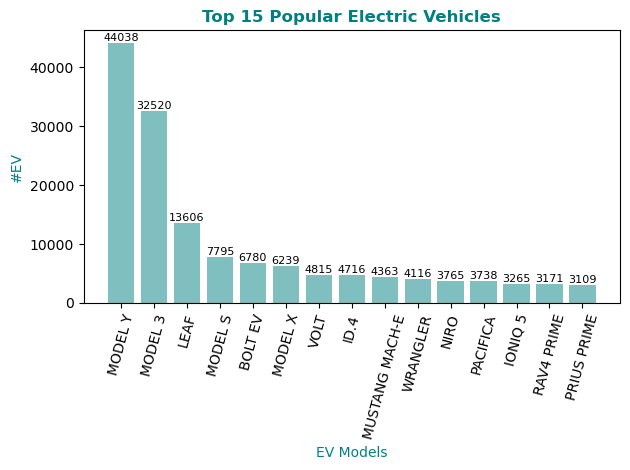

In [108]:
# Tell matplotlib that we will be making a bar chart
# We apply align="center" to ensure our bars line up with our tick marks

bars = plt.bar(x_axis, popularEV_15["Count"], color='teal', alpha=0.5, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,popularEV_15["Model"] ,rotation=75)

# Give our chart some labels and a tile
plt.title("Top 15 Popular Electric Vehicles",color="teal",fontweight='bold')
plt.xlabel("EV Models",color="teal")
plt.ylabel("#EV",color="teal")

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, 
             ha='center', va='bottom',fontsize=8,color="black")  # Add text at the top of the bar
    
plt.tight_layout()
plt.show()

In [127]:
#Get a dataframe only with the Model and Electic Range > 0
model_range=EV_df.groupby('Model')['Electric Range'].mean().reset_index(name='Count')
model_range = model_range.sort_values(by='Model', ascending=False)
print(model_range)

    Model      Count
152   ZDX   0.000000
151    XM  31.000000
150  XC90  23.980747
149  XC60  26.923414
148  XC40   0.000000
..    ...        ...
4    740E  14.000000
3    530E  16.122402
2    500E   0.000000
1     500  85.626923
0    330E  18.201980

[153 rows x 2 columns]


In [129]:
#Merge Electric Range and Grouped groupedEV_count to check the correlation between electric range and popularity
ev_count_to_range = pd.merge(groupedEV_count,model_range, on="Model")

ev_count_to_range. head()

,Model,Count_x,Count_y
0,MODEL Y,44038,14.801762
1,MODEL 3,32520,100.021740
2,LEAF,13606,80.969058
3,MODEL S,7795,172.836818
4,BOLT EV,6780,167.839971
